# HW 6 EE283 problem 1

In [2]:
# load the library
library("ATACseqQC")
library("Rsamtools")

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: GenomeInfoDb

Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: Biostrings

Loading required package: XVector


Attachin

In [1]:
# Set the working directory
# ucsc
setwd("/pub/mbarcen1/EE283/ATACseq/output/ucsc/sub_processed")

In [4]:
# List of 6 BAM files to process (include different tissue types)
bamfiles <- c("A4_ED_2.chrX.bam", "A4_WD_2.chrX.bam", 
              "A5_ED_3.chrX.bam", "A5_WD_3.chrX.bam", 
              "A6_ED_1.chrX.bam", "A6_WD_1.chrX.bam")

## Store fragment size plots

In [13]:
# Initialize an empty list to store fragment size distributions
fragSizes <- list()

# Create a directory to store the plots if it doesn't exist
dir.create("fragment_size_plots", showWarnings = FALSE)

# Loop through each BAM file
for (bamfile in bamfiles) {
  # Extract the label from the BAM file name
  bamfile.label <- gsub(".bam", "", basename(bamfile))
  
  # Set up the plotting device
  png(filename = file.path("fragment_size_plots", paste0(bamfile.label, "_fragsize.png")),
      width = 800, height = 600)
  
  # Generate fragment size distribution and plot
  fragSizes[[bamfile.label]] <- fragSizeDist(bamfile, bamfile.label)
  
  # Close the plotting device
  dev.off()
  
  # Print a message to indicate progress
  cat("Processed and saved plot for:", bamfile.label, "\n")
}

Processed and saved plot for: A4_ED_2.chrX 
Processed and saved plot for: A4_WD_2.chrX 
Processed and saved plot for: A5_ED_3.chrX 
Processed and saved plot for: A5_WD_3.chrX 
Processed and saved plot for: A6_ED_1.chrX 
Processed and saved plot for: A6_WD_1.chrX 


## Display library complexity 

Processed A4_ED_2.chrX - Fragment size plot and library complexity saved.


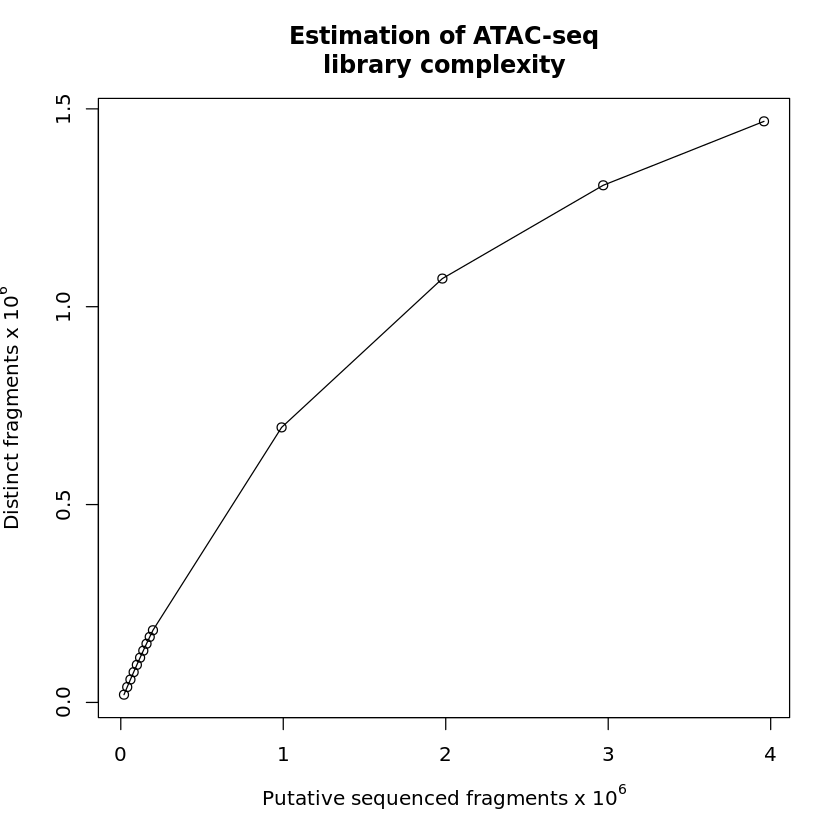

Processed A4_WD_2.chrX - Fragment size plot and library complexity saved.


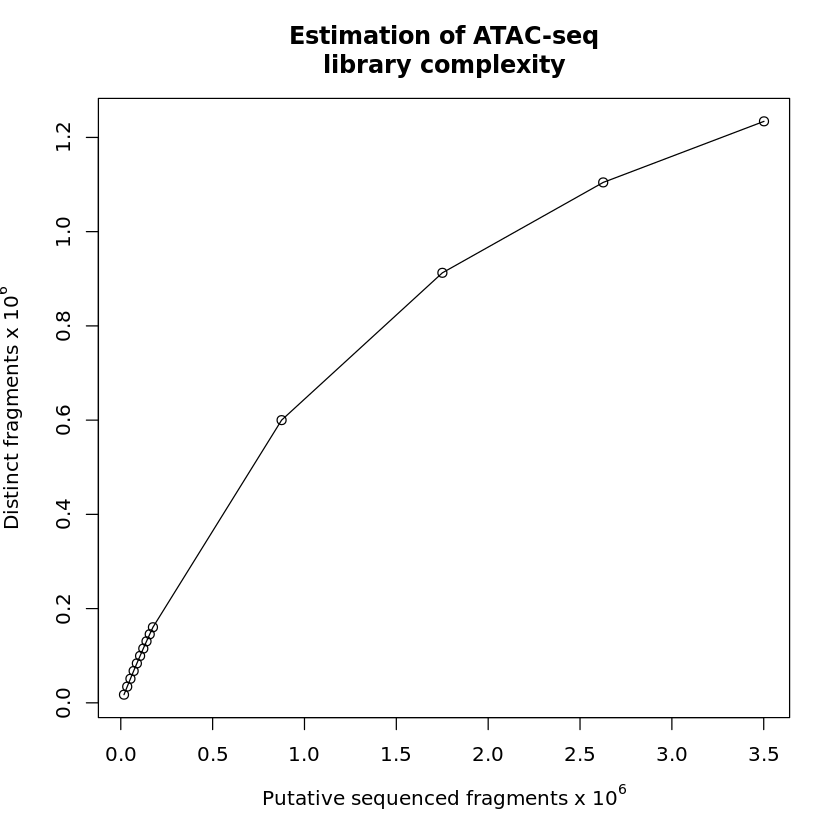

Processed A5_ED_3.chrX - Fragment size plot and library complexity saved.


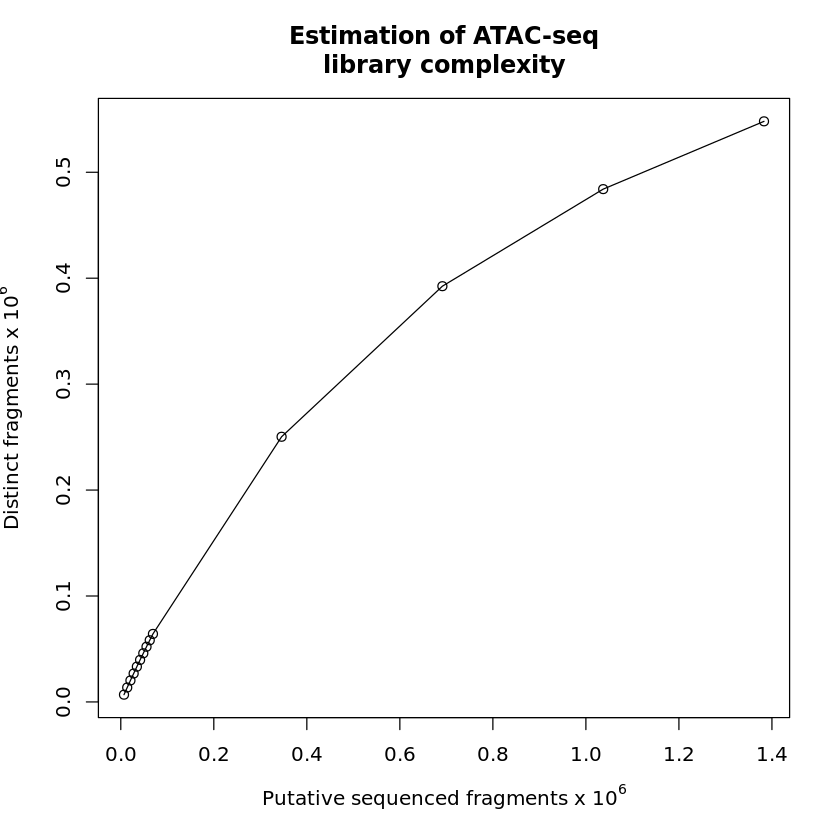

Processed A5_WD_3.chrX - Fragment size plot and library complexity saved.


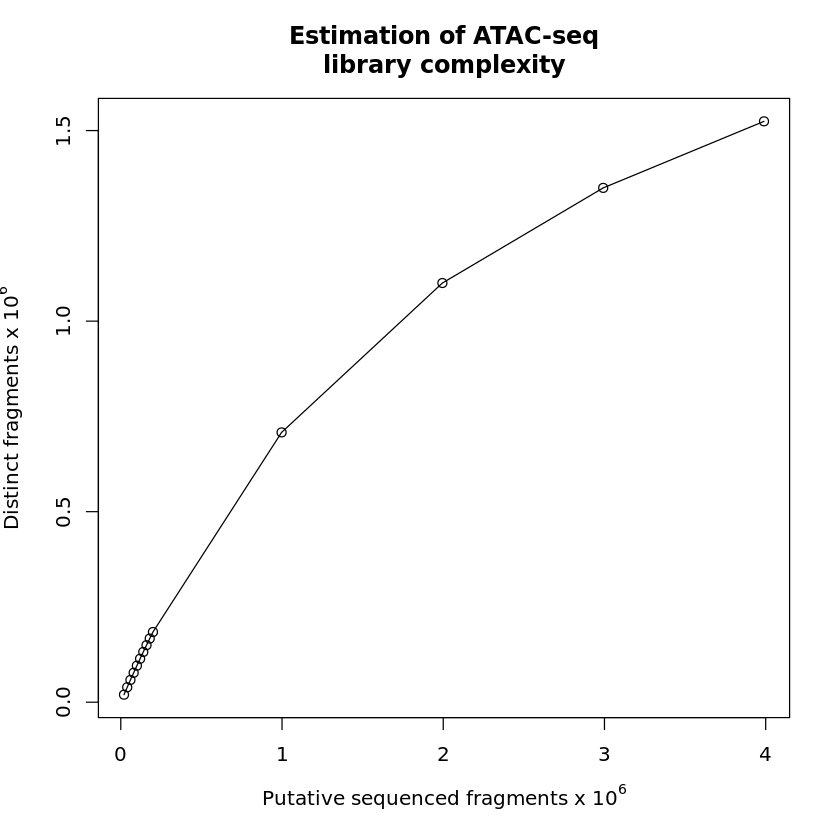

Processed A6_ED_1.chrX - Fragment size plot and library complexity saved.


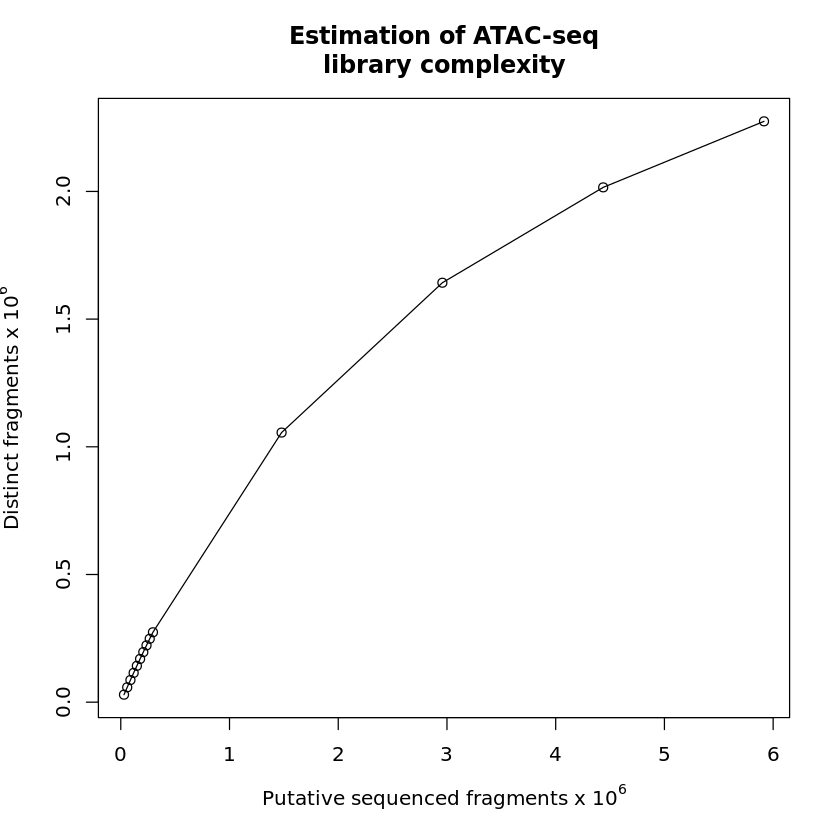

Processed A6_WD_1.chrX - Fragment size plot and library complexity saved.


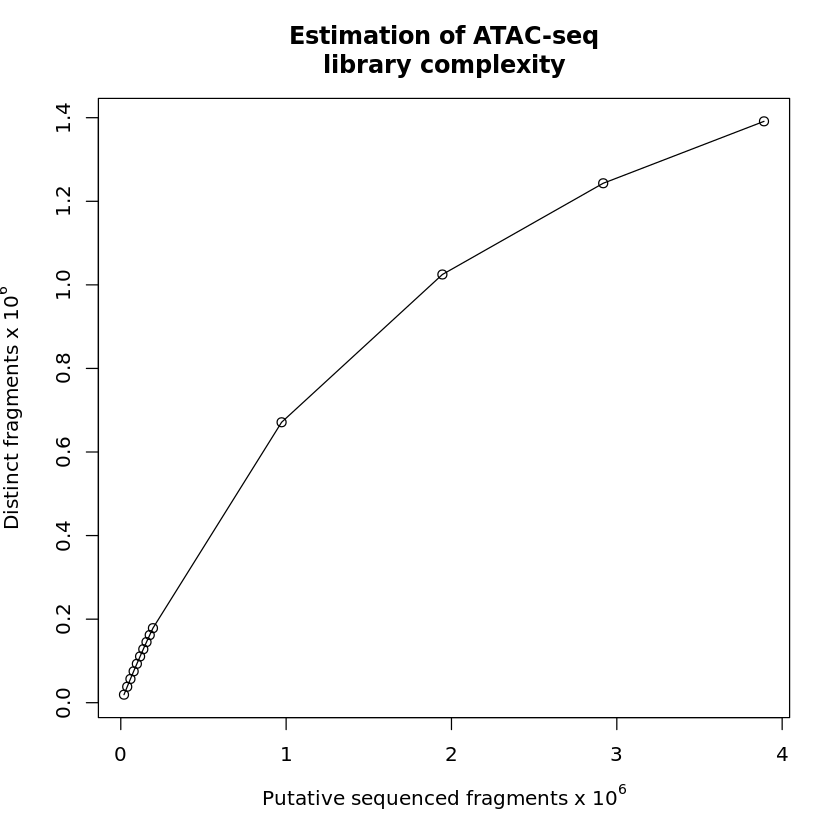

In [7]:
libComplexity <- list()

dir.create("library_complexity", showWarnings = FALSE)

# Loop through each BAM file
for (bamfile in bamfiles) {
  # Extract the label from the BAM file name
  bamfile.label <- gsub(".bam", "", basename(bamfile))
  
  # Library Complexity Estimation
  libComplexity[[bamfile.label]] <- estimateLibComplexity(readsDupFreq(bamfile, index=bamfile))
  
  # Save library complexity results
  write.csv(libComplexity[[bamfile.label]], 
            file = file.path("library_complexity", paste0(bamfile.label, "_libcomplexity.csv")),
            row.names = FALSE)
  
  # Print a message to indicate progress
  cat("Processed", bamfile.label, "- Fragment size plot and library complexity saved.\n")
}


## Save library complexity plots

In [11]:
dir.create("library_complexity_plots", showWarnings = FALSE)

# Loop through each BAM file
for (bamfile in bamfiles) {
  # Extract the label from the BAM file name
  bamfile.label <- gsub(".bam", "", basename(bamfile))
    # Set up the plotting device for library complexity
    
  png(filename = file.path("library_complexity_plots", paste0(bamfile.label, "_libcomplexity.png")),
      width = 800, height = 600)
    
  # Library Complexity Estimation
  libComplexity[[bamfile.label]] <- estimateLibComplexity(readsDupFreq(bamfile, index=bamfile))
  
  # Close the plotting device
  dev.off()
  
  # Print a message to indicate progress
  cat("Processed", bamfile.label, "- Fragment size and library complexity plots saved.\n")
}

Processed A4_ED_2.chrX - Fragment size and library complexity plots saved.
Processed A4_WD_2.chrX - Fragment size and library complexity plots saved.
Processed A5_ED_3.chrX - Fragment size and library complexity plots saved.
Processed A5_WD_3.chrX - Fragment size and library complexity plots saved.
Processed A6_ED_1.chrX - Fragment size and library complexity plots saved.
Processed A6_WD_1.chrX - Fragment size and library complexity plots saved.


In [16]:
# Loop through each BAM file
for (bamfile in bamfiles) {
  # Extract the label from the BAM file name
  bamfile.label <- gsub(".bam", "", basename(bamfile))
  
  ## files will be output into outPath
  outPath = "splited"
  dir.create(outPath)

  gal = readBamFile(bamfile, asMates=TRUE, bigFile=TRUE)
  # shift the GAlignmentsLists by 5' ends.
  # All reads aligning to the positive strand will be offset by +4bp,
  # and all reads aligning to the negative strand will be offset -5bp
  gal1 = shiftGAlignmentsList(gal)
  shiftedBamfile = file.path(outPath, paste0(bamfile.label, "_shifted.bam"))
  # for reasons BiocIO::export is not loaded above
  library(BiocIO)
  export(gal1, shiftedBamfile)
  
  # Print a message to indicate progress
  cat("Processed and shifted:", bamfile, "\n")
  cat("Shifted BAM saved as:", shiftedBamfile, "\n\n")
}

Processed and shifted: A4_ED_2.chrX.bam 
Shifted BAM saved as: splited/A4_ED_2.chrX_shifted.bam 

Processed and shifted: A4_WD_2.chrX.bam 
Shifted BAM saved as: splited/A4_WD_2.chrX_shifted.bam 

Processed and shifted: A5_ED_3.chrX.bam 
Shifted BAM saved as: splited/A5_ED_3.chrX_shifted.bam 

Processed and shifted: A5_WD_3.chrX.bam 
Shifted BAM saved as: splited/A5_WD_3.chrX_shifted.bam 

Processed and shifted: A6_ED_1.chrX.bam 
Shifted BAM saved as: splited/A6_ED_1.chrX_shifted.bam 

Processed and shifted: A6_WD_1.chrX.bam 
Shifted BAM saved as: splited/A6_WD_1.chrX_shifted.bam 



In [ ]:
library(TxDb.Dmelanogaster.UCSC.dm6.ensGene)
library(ATACseqQC)

# List of 6 BAM files to process (include different tissue types)
bamfiles <- c("A4_ED_2.chrX.bam", "A4_WD_2.chrX.bam", 
              "A5_ED_3.chrX.bam", "A5_WD_3.chrX.bam", 
              "A6_ED_1.chrX.bam", "A6_WD_1.chrX.bam")

# Prepare transcripts and TSS data (this is done once, outside the loop)
txs = transcripts(TxDb.Dmelanogaster.UCSC.dm6.ensGene)
TSS = promoters(txs, upstream=0, downstream=1)
TSS = unique(TSS)

# Create a main output directory
main_outPath = "splited_bams"
dir.create(main_outPath, showWarnings = FALSE)

# Loop through each BAM file
for (bamfile in bamfiles) {
  # Extract the label from the BAM file name
  bamfile.label <- gsub(".bam", "", basename(bamfile))
  
  # Create a unique output directory for this BAM file
  outPath = file.path(main_outPath, bamfile.label)
  dir.create(outPath, showWarnings = FALSE)

  # Read and shift the BAM file (assuming this step is needed)
  gal = readBamFile(bamfile, asMates=TRUE, bigFile=TRUE)
  gal1 = shiftGAlignmentsList(gal)

  # Split BAM by fragment size
  objs = splitGAlignmentsByCut(gal1, txs = txs, outPath = outPath)
  null = writeListOfGAlignments(objs, outPath)

  # List the files generated by splitBam
  generated_files = dir(outPath)
  cat("Files generated for", bamfile, ":\n")
  print(generated_files)
  cat("\n")
}

## Generate and save heatmap plots for distribution of reads mapping near TSSs

In [5]:
# Load required libraries
library(ChIPpeakAnno)
library(ATACseqQC)
library(TxDb.Dmelanogaster.UCSC.dm6.ensGene)

# Create output directory
outPath2 = "heatmap"
dir.create(outPath2, showWarnings = FALSE)

# Prepare transcripts and TSS data
txs = transcripts(TxDb.Dmelanogaster.UCSC.dm6.ensGene)
TSS = promoters(txs, upstream=0, downstream=1)
TSS = unique(TSS)

# List of directories containing split BAM files
split_dirs <- c("splited_bams/A4_ED_2.chrX", "splited_bams/A4_WD_2.chrX", 
                "splited_bams/A5_ED_3.chrX", "splited_bams/A5_WD_3.chrX", 
                "splited_bams/A6_ED_1.chrX", "splited_bams/A6_WD_1.chrX")

for (outPath in split_dirs) {
  # Extract a meaningful name from the directory path
  sample_name <- basename(outPath)
  
  # Define the split BAM files for this directory
  bamfiles = file.path(outPath, c("NucleosomeFree.bam","mononucleosome.bam","dinucleosome.bam","trinucleosome.bam"))
  
  # Estimate the library size for normalization
  librarySize = estLibSize(bamfiles)
  
  # Only consider these chromosomes (pick one for speed/memory)
  seqlev = "chrX"
  # seqlev = c("chrX","chr2L","chr2R","chr3L","chr3R")
  
  NTILE = 101
  dws = ups = 1010
  
  # Compute enriched fragments
  sigs = enrichedFragments(bamfiles, TSS=TSS, librarySize=librarySize, seqlev=seqlev,
                           TSS.filter=0.5, n.tile = NTILE, upstream = ups, downstream = dws)
  
  ## log2 transformed signals
  names(sigs) <- gsub(".bam", "", basename(names(sigs)))
  sigs.log2 <- lapply(sigs, function(.ele) log2(.ele+1))
  
  # Plot heatmap with informative filename
  heatmap_filename <- file.path(outPath2, paste0(sample_name, "_heatmap.png"))
  png(filename = heatmap_filename, width = 800, height = 600)
  featureAlignedHeatmap(sigs.log2, reCenterPeaks(TSS, width=ups+dws), zeroAt=.5, n.tile=NTILE)
  dev.off()
  
  cat("Processed and created heatmap for:", sample_name, "\n")
  cat("Heatmap saved as:", heatmap_filename, "\n\n")
}

Warning message in .make_GAlignmentPairs_from_GAlignments(gal, strandMode = strandMode, :
"  3 alignments with ambiguous pairing were dumped.
    Use 'getDumpedAlignments()' to retrieve them from the dump environment."
Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 7 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS485423v1_random,
  chrY_DS485938v1_random, chrUn_DS483910v1, chrUn_DS484581v1, and
  chrUn_DS484898v1. Note that ranges located on a sequence whose length
  is unknown (NA) or on a circular sequence are not considered
  out-of-bound (use seqlengths() and isCircular() to get the lengths and
  circularity flags of the underlying sequences). You can use trim() to
  trim these ranges. See ?`trim,GenomicRanges-method` for more
  information."
Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 13 out-of-bound ranges located on sequences
  chr4, chrY_DS4837

Processed and created heatmap for: A4_ED_2.chrX 
Heatmap saved as: heatmap/A4_ED_2.chrX_heatmap.png 



Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 7 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS485423v1_random,
  chrY_DS485938v1_random, chrUn_DS483910v1, chrUn_DS484581v1, and
  chrUn_DS484898v1. Note that ranges located on a sequence whose length
  is unknown (NA) or on a circular sequence are not considered
  out-of-bound (use seqlengths() and isCircular() to get the lengths and
  circularity flags of the underlying sequences). You can use trim() to
  trim these ranges. See ?`trim,GenomicRanges-method` for more
  information."
Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 13 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS483875v1_random,
  chrY_DS484142v1_random, chrY_DS484530v1_random, chrY_DS484909v1_random,
  chrY_DS485423v1_random, chrY_DS485523v1_random, chrY_DS485938v1_random,
  chrUn_CP007102v1, chrUn_DS483910

Processed and created heatmap for: A4_WD_2.chrX 
Heatmap saved as: heatmap/A4_WD_2.chrX_heatmap.png 



Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 7 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS485423v1_random,
  chrY_DS485938v1_random, chrUn_DS483910v1, chrUn_DS484581v1, and
  chrUn_DS484898v1. Note that ranges located on a sequence whose length
  is unknown (NA) or on a circular sequence are not considered
  out-of-bound (use seqlengths() and isCircular() to get the lengths and
  circularity flags of the underlying sequences). You can use trim() to
  trim these ranges. See ?`trim,GenomicRanges-method` for more
  information."
Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 13 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS483875v1_random,
  chrY_DS484142v1_random, chrY_DS484530v1_random, chrY_DS484909v1_random,
  chrY_DS485423v1_random, chrY_DS485523v1_random, chrY_DS485938v1_random,
  chrUn_CP007102v1, chrUn_DS483910

Processed and created heatmap for: A5_ED_3.chrX 
Heatmap saved as: heatmap/A5_ED_3.chrX_heatmap.png 



Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 7 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS485423v1_random,
  chrY_DS485938v1_random, chrUn_DS483910v1, chrUn_DS484581v1, and
  chrUn_DS484898v1. Note that ranges located on a sequence whose length
  is unknown (NA) or on a circular sequence are not considered
  out-of-bound (use seqlengths() and isCircular() to get the lengths and
  circularity flags of the underlying sequences). You can use trim() to
  trim these ranges. See ?`trim,GenomicRanges-method` for more
  information."
Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 13 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS483875v1_random,
  chrY_DS484142v1_random, chrY_DS484530v1_random, chrY_DS484909v1_random,
  chrY_DS485423v1_random, chrY_DS485523v1_random, chrY_DS485938v1_random,
  chrUn_CP007102v1, chrUn_DS483910

Processed and created heatmap for: A5_WD_3.chrX 
Heatmap saved as: heatmap/A5_WD_3.chrX_heatmap.png 



Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 7 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS485423v1_random,
  chrY_DS485938v1_random, chrUn_DS483910v1, chrUn_DS484581v1, and
  chrUn_DS484898v1. Note that ranges located on a sequence whose length
  is unknown (NA) or on a circular sequence are not considered
  out-of-bound (use seqlengths() and isCircular() to get the lengths and
  circularity flags of the underlying sequences). You can use trim() to
  trim these ranges. See ?`trim,GenomicRanges-method` for more
  information."
Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 13 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS483875v1_random,
  chrY_DS484142v1_random, chrY_DS484530v1_random, chrY_DS484909v1_random,
  chrY_DS485423v1_random, chrY_DS485523v1_random, chrY_DS485938v1_random,
  chrUn_CP007102v1, chrUn_DS483910

Processed and created heatmap for: A6_ED_1.chrX 
Heatmap saved as: heatmap/A6_ED_1.chrX_heatmap.png 



Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 7 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS485423v1_random,
  chrY_DS485938v1_random, chrUn_DS483910v1, chrUn_DS484581v1, and
  chrUn_DS484898v1. Note that ranges located on a sequence whose length
  is unknown (NA) or on a circular sequence are not considered
  out-of-bound (use seqlengths() and isCircular() to get the lengths and
  circularity flags of the underlying sequences). You can use trim() to
  trim these ranges. See ?`trim,GenomicRanges-method` for more
  information."
Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 13 out-of-bound ranges located on sequences
  chr4, chrY_DS483742v1_random, chrY_DS483875v1_random,
  chrY_DS484142v1_random, chrY_DS484530v1_random, chrY_DS484909v1_random,
  chrY_DS485423v1_random, chrY_DS485523v1_random, chrY_DS485938v1_random,
  chrUn_CP007102v1, chrUn_DS483910

Processed and created heatmap for: A6_WD_1.chrX 
Heatmap saved as: heatmap/A6_WD_1.chrX_heatmap.png 

